In [1]:
#Please execute this cell
import jupman;

# Exam -  Mon 06, Sep 2021 EXERCISES

**Scientific Programming - Data Science Master @ University of Trento**

## [Download exercises and solutions](_static/generated/sciprog-ds-2021-09-06-exam.zip)

## Part A - I CHING Divination

Open Jupyter and start editing this notebook `exam-2021-09-06.ipynb`


The I Ching, or Book of Changes, is a chinese divination manual and philosophical text  which is believed to be one of the world's oldest books, dating from over 3,000 years ago. 

The great mathematician Gottfried Wilhelm Leibniz (1646 - 1716) is considered the first information theorist, and extensively documented the binary numeral system. Leibniz was also interested in Chinese culture, and [saw in the I Ching diagrams](https://en.wikipedia.org/wiki/Gottfried_Wilhelm_Leibniz#Sinophile) showing solid and broken lines called yin and yang, which progressed in a sequence: that was unmistakably a binary encoding. 

You will parse a dataset of hexagrams and develop a divinator software which will predict the outcome of your exam.

Data source: [Wikipedia, July 2021, Bagua page](https://en.wikipedia.org/wiki/Bagua)

**Yin and yang**: Yin and yang are represented by lines: 

|name|line|bit|
|----|-----|---|
|yin |`- -`| 0 |
|yang|`---`| 1 |

**Trigrams**: Different constructions of three yin and yang lines lead to 8 trigrams. We can express a trigram as a sequence of bits, reading lines from bottom to top. For example _Fire_ is `101`, _Thunder_ is `100`.

![iching-lookup-table-header.png](img/iching-lookup-table-header.png)

**Hexagrams**: Combining a lower trigram with an upper trigram leads to 64 hexagrams. Each hexagram can be represented as a sequence of bits and the outcome of a divination. For example trigrams _Fire_ (lower) and _Thunder_ (upper) gives outcome hexagram _Abounding_: `101100`

![iching-lookup-table.png](img/iching-lookup-table.png)

## A1 load_db

Parse [iching.csv](iching.csv) and output a dictionary mapping each sequence to a dictionary with all the information you can extract. Use CSV reader.

- in headers and first column you will find a bit sequence like `011`
- in body cells, you will **not** find a bit sequence: you will have to determine it according to the corresponding tri-sequences from the header and first column
- note for hexagrams you must extract **only** `name-en`, ignore the decimal numbers
- complete expected output is in file [expected_iching_db.py](expected_iching_db.py)

In [148]:
import csv

def load_db(filepath):
    with open(filepath, encoding='utf-8', newline='') as f:
        dizionario={}
        matrice=[]
        listone=[]
        my_reader=csv.reader(f, delimiter=',')
        lista_codici=[]
        codici=[]
        for r in my_reader:
            lista_codici.append(r[0])     
            row=r[1:]
            matrice.append(row) #creo una matrice, su cui itero nelle colonne
        
        #estraggo la lista con le chiavi

        lista_codici=lista_codici[1:]
        for el in lista_codici:
            codice=el.split('\n')[1]
            codici.append(codice)
        #print(codici)
            
       

            
        
        
        j=0
        while j<len(row): #estraggo le colonne
            ret=[]
            for row in matrice:
                ret.append(row[j])
            listone.append(ret)
            j+=1
        #print(listone)
        
       
            
        for l in listone:
            count=0
            for riga in l:
                diz={}
                riga=riga.split('\n')
                lista=[el for el in riga if el!=' ' and el!='']
                if len(lista)>2:
                    #print(lista)
                    lst_nome=lista[0].split('\xa0')
                    #print(lst_nome)
                    simbolo=lst_nome[0]
                    ch_name=lst_nome[1]
                    key_1=lista[1]
                    #da inserire nel dizionario grande
                    en_name=lista[-1]
                    diz['name-ch']=simbolo
                    diz['name-en']=en_name
                    diz['spelling']=ch_name
                    #ret[key_initial]=diz
                    key=key_1
                else:
                    key= codici[count]+ key_1
                    #da inserire nel dizionario grande
                    #print(key)
                    name_en=lista[1]
                    diz['name-en']=name_en
                    count+=1
                dizionario[key]=diz
        #print(dizionario)
        return dizionario
                  
                
            
            
                
        
        

iching_db = load_db('iching.csv')   
iching_db


{'111': {'name-ch': '乾', 'name-en': 'Heaven', 'spelling': 'Qián'},
 '111111': {'name-en': 'Force'},
 '000111': {'name-en': 'Obstruction'},
 '100111': {'name-en': 'Innocence'},
 '010111': {'name-en': 'Arguing'},
 '001111': {'name-en': 'Retiring'},
 '011111': {'name-en': 'Coupling'},
 '101111': {'name-en': 'Concording People'},
 '110111': {'name-en': 'Treading'},
 '000': {'name-ch': '坤', 'name-en': 'Earth', 'spelling': 'Kūn'},
 '111000': {'name-en': 'Pervading'},
 '000000': {'name-en': 'Field'},
 '100000': {'name-en': 'Returning'},
 '010000': {'name-en': 'Leading'},
 '001000': {'name-en': 'Humbling'},
 '011000': {'name-en': 'Ascending'},
 '101000': {'name-en': 'Intelligence Hidden'},
 '110000': {'name-en': 'Nearing'},
 '100': {'name-ch': '震', 'name-en': 'Thunder', 'spelling': 'Zhèn'},
 '111100': {'name-en': 'Great Invigorating'},
 '000100': {'name-en': 'Providing For'},
 '100100': {'name-en': 'Shake'},
 '010100': {'name-en': 'Deliverance'},
 '001100': {'name-en': 'Small Exceeding'},
 '01

EXERPT:

{'111': {'name-en': 'Heaven', 'name-ch': '乾', 'spelling': 'Qián'}
 '000': {'name-en': 'Earth', 'name-ch': '坤', 'spelling': 'Kūn'}
 '100': {'name-en': 'Thunder', 'name-ch': '震', 'spelling': 'Zhèn'}
 '010': {'name-en': 'Water', 'name-ch': '坎', 'spelling': 'Kǎn'}
 '001': {'name-en': 'Mountain', 'name-ch': '艮', 'spelling': 'Gèn'}
 '011': {'name-en': 'Air', 'name-ch': '巽', 'spelling': 'Xùn'}
 '101': {'name-en': 'Fire', 'name-ch': '離', 'spelling': 'Lí'}
 '110': {'name-en': 'Lake', 'name-ch': '兌', 'spelling': 'Duì'}
 '111111': {'name-en': 'Force'}
 '111000': {'name-en': 'Pervading'}
 '111100': {'name-en': 'Great Invigorating'}
 '111010': {'name-en': 'Attending'}
 '111001': {'name-en': 'Great Accumulating'}
 '111011': {'name-en': 'Small Harvest'}
 '111101': {'name-en': 'Great Possessing'}
     .
     .
}


In [171]:
# EXECUTE FOR TESTING
from pprint import pformat; from expected_iching_db import expected_iching_db
for seq in expected_iching_db.keys():
    if seq not in iching_db: print('\nERROR: MISSING sequence', seq); break    
    for k in expected_iching_db[seq]:
        if k not in iching_db[seq]:
            print('\nERROR at sequence', seq,'\n\n   MISSING key:', k); break    
        if expected_iching_db[seq][k] != iching_db[seq][k]:
            print('\nERROR at sequence', seq, 'key:',k)
            print('  ACTUAL:\n', pformat(iching_db[seq][k]))
            print('  EXPECTED:\n', pformat(expected_iching_db[seq][k]))
            break

## A2 divine

A divination is done by flipping 3 coins to determine the bottom trigram (**bottom up order**), flipping other three coins for the upper trigram (again **bottom up order**), and then the union gives the resulting hexagram. Write a function that PRINTS the process as in the example and RETURNS a string of bits representing the resulting hexagram

**HINT**: to flip coins use `random.randint(0,1)`


<div class="alert alert-warning">
    
**WARNING: DOUBLE CHECK THE ORDER IN WHICH LINES ARE VISUALIZED!**    
    
</div>    

In [172]:
import random

def divine(iching, question):
    
    #THE SEED DETERMINES FOLLOWING randint RESULTS
    random.seed(109)      # Abounding
                          # Thunder  
                          # Fire
    
    #IMPORTANT: try also this seed to check lines visualization order
    #random.seed(1)                                  
    #
    # Infiltrating 001011
    # Mountain ---
    #          ---
    #          - -
    # Air      ---
    #          - -
    #          - -            
    
    print()
    print("Dear stranger, welcome to SCIPROG I CHING 易經 DIVINATOR")
    print()
    print("Tell me your question...")
    print()    
    print('       ', question)
    print()
    
    
    ret_1=[]
    disegno_1=[]
    ret_2=[]
    disegno_2=[]
    ret=[]
    disegno=[]
    
    for i in range(3):
        coin=random.randint(0,1)
        ret_1.append(str(coin))
    code=''.join(ret_1)
    name=iching[code]['name-en']
    
    for el in ret_1:
        if el=='1':
            dis_1='---'
            disegno_1.append(dis_1)
            print('The coin says heads : we get a yang ---')
        else:
            dis='- -'
            disegno_1.append(dis)
            print('The coin says tails: we get a  yin - -')
    print('The sacred bottom trigram is:')
    print('   ')
    print(name)
    for el in disegno_1:
        print(el)
    
    print(' ')
    
    for i in range(3):
        coin=random.randint(0,1)
        ret_2.append(str(coin))
    code=''.join(ret_2)
    name=iching[code]['name-en']
    
    for el in ret_2:
        if el=='1':
            dis_1='---'
            disegno_2.append(dis_1)
            print('The coin says heads : we get a yang ---')
        else:
            dis='- -'
            disegno_2.append(dis)
            print('The coin says tails: we get a  yin - -')
    print('The sacred bottom trigram is:')
    print('   ')
    print(name)
    for el in disegno_2:
        print(el)
    print('The final response hexagram is...')
    ret.extend(ret_1)
    ret.extend(ret_2)
    disegno.extend(disegno_1)
    disegno.extend(disegno_2)
    
    #print(ret)
    code=''.join(ret)
    name=iching[code]['name-en']
    
    print(name)
    for el in disegno:
        print(el)
    return name
    
    
    
            


divination = divine(iching_db, "Will I pass the exam?")
print("\nReturned:", divination)


Dear stranger, welcome to SCIPROG I CHING 易經 DIVINATOR

Tell me your question...

        Will I pass the exam?

The coin says heads : we get a yang ---
The coin says tails: we get a  yin - -
The coin says heads : we get a yang ---
The sacred bottom trigram is:
   
Fire
---
- -
---
 
The coin says heads : we get a yang ---
The coin says tails: we get a  yin - -
The coin says tails: we get a  yin - -
The sacred bottom trigram is:
   
Thunder
---
- -
- -
The final response hexagram is...
Abounding
---
- -
---
---
- -
- -

Returned: Abounding


## A3 plot_divination

Given a divination as a string of bits, plot the divination. 

* first draw the lines, then the rest if you have time. 
* make it fancy with these [examples](https://en.softpython.org/visualization/visualization-sol.html#Fancy-plots)
* to center text you can use these parameters: `ha='center', va='center'`

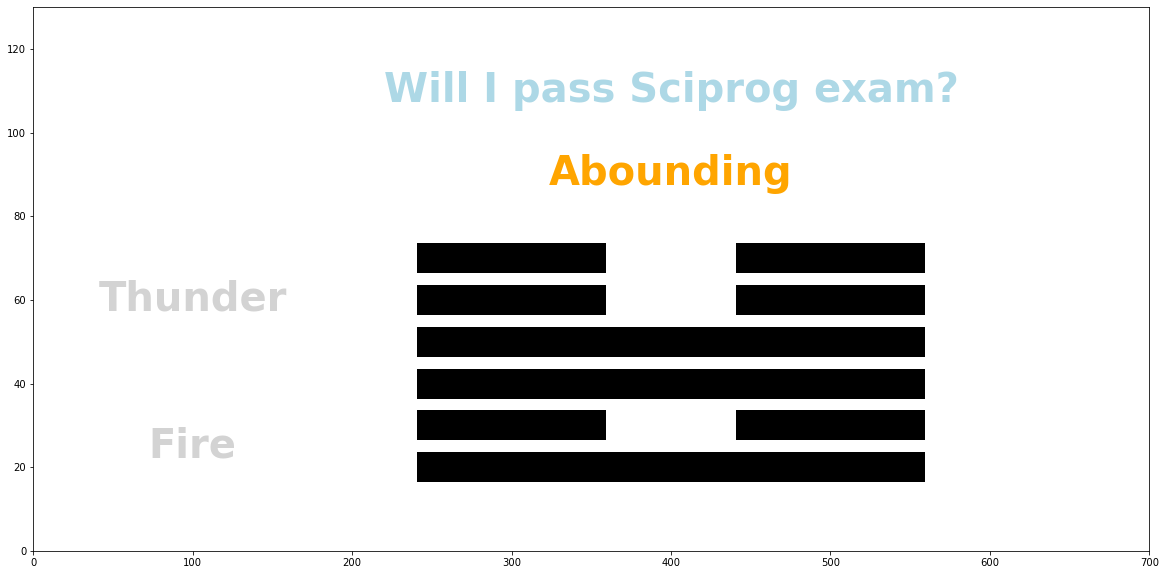

In [219]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_divination(iching, question, divination):
    
    r_1=iching[divination[:(len(divination)//2)]]['name-en']
    r_2=iching[divination[((len(divination)//2)):]]['name-en']
    #print(r_1)
    #print(r_2)
    
    result=iching[divination]['name-en']
    
    fig = plt.figure(figsize=(20,10))
    plt.text(400, 110, question,fontsize=40, fontweight='bold',color="lightblue",
             ha='center', # centers text horizontally
             va='center')
    
    plt.text(400, 90, result,fontsize=40, fontweight='bold',color="orange",
             ha='center', # centers text horizontally
             va='center')
    plt.text(100, 60, r_2,fontsize=40, fontweight='bold',color="lightgrey",
             ha='center', # centers text horizontally
             va='center')
    plt.text(100, 25, r_1,fontsize=40, fontweight='bold',color="lightgrey",
             ha='center', # centers text horizontally
             va='center')

    y=20
    for el in divination:
        if el=='1':
            ys=[y,y]
            xs=[250, 550]
            plt.plot(xs,ys, color='black', linewidth=30)
        elif el=='0':
            ys=[y,y]
            xs_1=[250, 350]
            xs_2=[450,550]
            plt.plot(xs_1,ys, color='black',linewidth=30)
            plt.plot(xs_2,ys, color='black',linewidth=30)
        y+=10
   # y_ticks=[0 for el in ys ]
    #plt.yticks(y_ticks,y_ticks)
    plt.xlim(0,700) # important to set when you add images
    plt.ylim(0,130)
    plt.show()
        
    
            
    
    
    
plot_divination(iching_db, "Will I pass Sciprog exam?", '101100')  # Abounding
#plot_divination(iching_db, "Will I pass Sciprog exam?", '111011') # Small Harvest
#plot_divination(iching_db, "Will I pass Sciprog exam?",'001011')  # Infiltrating

In [ ]:
help(bar)

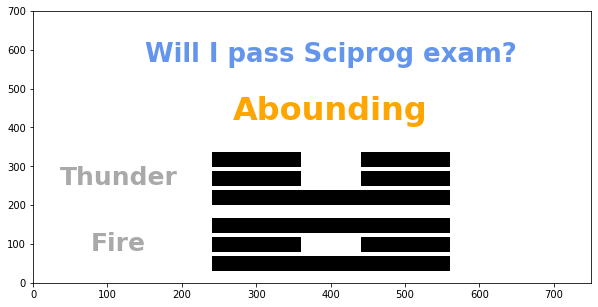

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_divination(iching, question, divination):
    raise Exception('TODO IMPLEMENT ME !')
    
plot_divination(iching_db, "Will I pass Sciprog exam?", '101100')  # Abounding
#plot_divination(iching_db, "Will I pass Sciprog exam?", '111011') # Small Harvest
#plot_divination(iching_db, "Will I pass Sciprog exam?",'001011')  # Infiltrating

## Part B

* Open Visual Studio Code and start editing the folder on your desktop

## B1 Theory

**Write the solution in separate `theory.txt` file**

### B1.1 Complexity

**1.A:** Given a list `L` of $n$ elements, please compute the asymptotic computational complexity of the `my_fun` function, explaining your reasoning.
 

```python
def my_fun(L):
    tmp = [1 for x in L]
    n = sum(tmp)

    for i in range(1, int(n/2)+1):
        if L[i-1] != L[-i]:
            return False
        else:
            return True
```

**1.B:** Do you have any idea to improve this code a little bit? 

### B1.2 nlogn

What do we mean when we say that an algorithm has asymptotic computational complexity $O(n logn)$? What do we have to do to prove that an algorithm has asymptotic computational complexity $O(nlogn)$? 

## B2 Train race

An important train race is taking place in Steam Land. Each train has a length and a velocity. A train is represented as a sequence of asterisks. A _train path_ is a list which holds all the train asterisks, and, if the train has moved _m_ positions so far, the path also holds _m_ dashes `-` before the asterisks. 

Open the file `train_race.py` and implement methods from class `TrainRace`, in particular:

def step(self):
    """ Steps the simulation by moving each train toward right 
        by a number of cells given by its velocity.            
        
                    
        *** MUST run in O(v) where v is the sum of all velocities     
        
        *** Complexity MUST *NOT* depend on train length nor dashes length
        
        *** For simplicity, ASSUME velocity is always 
            less or equal than train length                 
        
        ********      HAVE YOU READ THE REQUIREMENTS ABOVE ?   ********
    """


<div class="alert alert-warning">
    
**WARNING: AVOID EXPENSIVE LIST METHODS / OPERATORS**    
    
Passing tests is easy, the hard part is to make it _fast_: will your program run fast with a train of one million asterisks? And with a train which made a million steps?
    
</div>

**Testing**: `python3 -m unittest train_race_test.VelocityLessOrEqualThanTrainSizeTest`

**Extra** (not required during the exam): make it work also when velocity can be greater than train size, then test with: 

`python3 -m unittest train_race_test.VelocityGreaterThanTrainSizeTest`

**Example**:

In [8]:
from train_race_sol import * 

       #train  lengths     velocities
tr = TrainRace([5,3,6,3],  [2,1,3,2])

In [9]:
tr.get_paths()

[['*', '*', '*', '*', '*'],
 ['*', '*', '*'],
 ['*', '*', '*', '*', '*', '*'],
 ['*', '*', '*']]

In [10]:
tr.step()   # returns NOTHING!

In [11]:
tr.get_paths()

[['-', '-', '*', '*', '*', '*', '*'],
 ['-', '*', '*', '*'],
 ['-', '-', '-', '*', '*', '*', '*', '*', '*'],
 ['-', '-', '*', '*', '*']]

In [12]:
tr.step()

In [13]:
tr.get_paths()

[['-', '-', '-', '-', '*', '*', '*', '*', '*'],
 ['-', '-', '*', '*', '*'],
 ['-', '-', '-', '-', '-', '-', '*', '*', '*', '*', '*', '*'],
 ['-', '-', '-', '-', '*', '*', '*']]

## B3 linked algebra

Open `linked_list.py` and edit this method:

def linalg(self):
    """ Assume nodes hold data as a string "kc" where k is a single digit 
        and c any character.
        
        MODIFY the linked list by stripping the k from original nodes, 
        and inserting k-1 new nodes next to each node.
                
        - ASSUME every k is >= 1
        - MUST execute in O(s) where s is the sum of all k found.
    """


**Testing**: `python3 -m unittest linked_list_test`

**Example:**

In [15]:
from linked_list_sol import *

ll = LinkedList()

ll.add('2c')
ll.add('5b')
ll.add('3a')

print(ll)

LinkedList: 3a,5b,2c


In [16]:
ll.linalg()   # returns NOTHING!

In [17]:
print(ll)

LinkedList: a,a,a,b,b,b,b,b,c,c


with 3 nodes modified and 7 new nodes inserted